## **Data Preparation**

### Load Library

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report

### Set Random Seed

In [258]:
set_seed = np.random.seed(1046)

### Load Dataset

In [259]:
data = 'data/heart.csv'

df = pd.read_csv(data)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Declare Feature Vector and Target Variable

In [260]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

### Encode Data

In [261]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
col_encode = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
X=X[col_encode].apply(encoder.fit_transform)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


### Split Data Into Separate Training and Test Set

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=set_seed)

## **Model 1 : KNN (K-Nearest Neighbor)**

In [263]:
# initial k
initial_k = int(np.sqrt(X.shape[0]))

# knn
knn = KNeighborsClassifier(n_neighbors=initial_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### Confusion Matrix

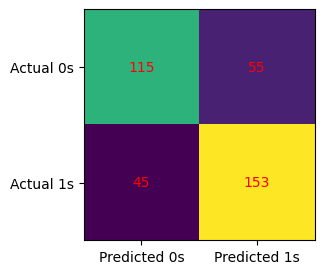

In [264]:
cm = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Classification Report

In [265]:
print(classification_report(y_test, y_pred_knn, digits=5))

              precision    recall  f1-score   support

           0    0.71875   0.67647   0.69697       170
           1    0.73558   0.77273   0.75369       198

    accuracy                        0.72826       368
   macro avg    0.72716   0.72460   0.72533       368
weighted avg    0.72780   0.72826   0.72749       368



## **Model 2 : Decision Tree (Entropy Criterion)**

In [266]:
# instantiate the DecisionTreeClassifier model with criterion entropy
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=set_seed)

# fit the model
dt.fit(X_train, y_train)

# Predict the Test set results with criterion entropy
y_pred_dt = dt.predict(X_test)

### Confusion Matrix

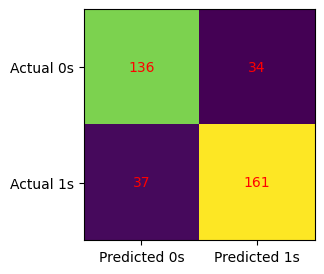

In [267]:
cm = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Classification Report

In [268]:
print(classification_report(y_test, y_pred_dt, digits=5))

              precision    recall  f1-score   support

           0    0.78613   0.80000   0.79300       170
           1    0.82564   0.81313   0.81934       198

    accuracy                        0.80707       368
   macro avg    0.80588   0.80657   0.80617       368
weighted avg    0.80739   0.80707   0.80717       368



## **Model 3 : Naive Bayes**

In [269]:
# training the model on training set
nb = GaussianNB()
nb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred_nb = nb.predict(X_test)

### Confusion Matrix

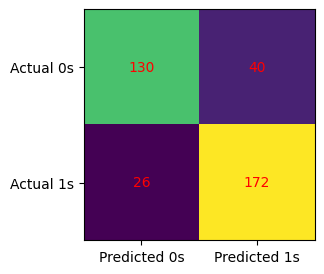

In [270]:
cm = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Classification Report

In [271]:
print(classification_report(y_test, y_pred_nb, digits=5))

              precision    recall  f1-score   support

           0    0.83333   0.76471   0.79755       170
           1    0.81132   0.86869   0.83902       198

    accuracy                        0.82065       368
   macro avg    0.82233   0.81670   0.81829       368
weighted avg    0.82149   0.82065   0.81986       368



## **n-Fold Cross Validation**

### KNN (K-Nearest Neighbor)

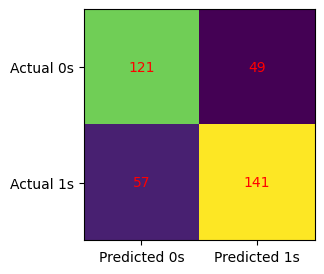

In [272]:
y_pred_nfold_knn = cross_val_predict(knn, X_test, y_test, cv=5)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_nfold_knn)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [273]:
print(classification_report(y_test, y_pred_nfold_knn, digits=5))

              precision    recall  f1-score   support

           0    0.67978   0.71176   0.69540       170
           1    0.74211   0.71212   0.72680       198

    accuracy                        0.71196       368
   macro avg    0.71094   0.71194   0.71110       368
weighted avg    0.71331   0.71196   0.71230       368



### Decision Tree (Entropy Criterion)

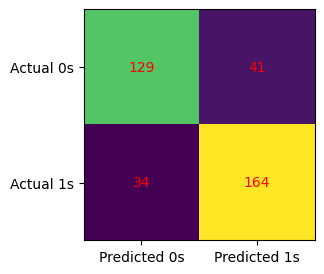

In [274]:
y_pred_nfold_dt = cross_val_predict(dt, X_test, y_test, cv=5)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_nfold_dt)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [275]:
print(classification_report(y_test, y_pred_nfold_dt, digits=5))

              precision    recall  f1-score   support

           0    0.79141   0.75882   0.77477       170
           1    0.80000   0.82828   0.81390       198

    accuracy                        0.79620       368
   macro avg    0.79571   0.79355   0.79434       368
weighted avg    0.79603   0.79620   0.79582       368



### Naive Bayes

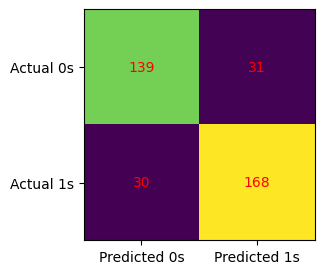

In [276]:
y_pred_nfold_nb = cross_val_predict(nb, X_test, y_test, cv=5)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_nfold_nb)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [277]:
print(classification_report(y_test, y_pred_nfold_nb, digits=5))

              precision    recall  f1-score   support

           0    0.82249   0.81765   0.82006       170
           1    0.84422   0.84848   0.84635       198

    accuracy                        0.83424       368
   macro avg    0.83335   0.83307   0.83320       368
weighted avg    0.83418   0.83424   0.83420       368

